In [5]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib as plt

In [6]:
tract = geopandas.read_file('Clean Data/census_tract_nyc.geojson')
tract.rename(columns={'GEOID':"GEO_ID"}, inplace=True)
tract['GEO_ID'] = tract['GEO_ID'].apply(int)

In [7]:
tract.head()
# print(len(tract))   # 2164

,GEO_ID,County,first_4_digits,boro,geometry
0,36005000100,Bronx County,3600,5000,"POLYGON ((-8223304.523 4981044.586, -8223307.3..."
1,36005000200,Bronx County,3600,5000,"POLYGON ((-8221503.700 4983296.896, -8221648.4..."
2,36005000400,Bronx County,3600,5000,"MULTIPOLYGON (((-8221072.012 4985004.760, -822..."
3,36005001600,Bronx County,3600,5001,"POLYGON ((-8221516.289 4986187.406, -8221497.4..."
4,36005001900,Bronx County,3600,5001,"MULTIPOLYGON (((-8226302.917 4982445.645, -822..."


In [8]:
income_rent = pd.read_csv('Clean Data/income_rent_2010.csv')
income_rent = income_rent[['GEO_ID', 'MEDIAN_HOUSEHOLD_INCOME_2010', 'MEDIAN_RENT_2010', 'GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010']]
income_rent['MEDIAN_HOUSEHOLD_INCOME_2010'] = income_rent['MEDIAN_HOUSEHOLD_INCOME_2010'].apply(int)
income_rent['MEDIAN_RENT_2010'] = income_rent['MEDIAN_RENT_2010'].apply(int)
income_rent['GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010'] = income_rent['GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010'].apply(int)

income_rent.head()

,GEO_ID,MEDIAN_HOUSEHOLD_INCOME_2010,MEDIAN_RENT_2010,GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010
0,36005039000,35729,539,63
1,36005039100,22081,1853,145
2,36005039200,57000,440,34
3,36005039300,17988,3029,355
4,36005039400,35329,1291,263


<AxesSubplot:>

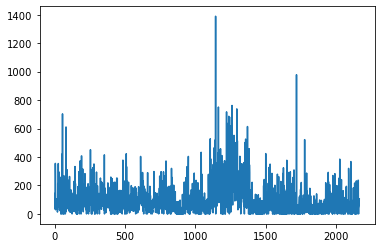

In [25]:
# income_rent.shape   2164
# print(income_rent.dtypes)
income_rent.describe()
income_rent['GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010'].plot()

In [12]:
income_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   GEO_ID                                    2168 non-null   int64
 1   MEDIAN_HOUSEHOLD_INCOME_2010              2168 non-null   int64
 2   MEDIAN_RENT_2010                          2168 non-null   int64
 3   GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010  2168 non-null   int64
dtypes: int64(4)
memory usage: 67.9 KB


In [17]:
geo_income_rent = pd.merge(tract, income_rent, how='inner', on='GEO_ID')

<AxesSubplot:>

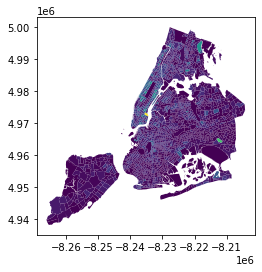

In [26]:
geo_income_rent.plot(column='GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010')

In [ ]:
print(income_rent.dtypes)
# tract_income_rent = pd.merge(tract, income_rent, how='inner', left_on='GEOID', right_on='GEO_ID').drop(columns='GEO_ID')
# TODO: merge these two datasets.

In [ ]:
gpf_slim.to_file('census_nyc_playing.geojson',driver='GeoJSON')
